# Data frames with Pandas

## Programming and Data Management (EDI 3400)

### *Vegard H. Larsen (Department of Data Science and Analytics)*

# 1. What is Pandas?

Pandas is a premier data manipulation and analysis library in Python, providing intuitive structures for organizing and processing data alongside a suite of powerful tools to explore, clean, and analyze it. Central to Pandas are its two primary data structures: the `Series`, which handles one-dimensional data, and the `DataFrame`, designed for two-dimensional data (akin to tables in a database or Excel sheets). With these structures, you can easily read data from various sources, manipulate rows and columns, handle missing values, and even merge or aggregate data from multiple tables. Many tasks traditionally done in spreadsheet software can be more efficiently and robustly performed in code, laying a foundational bridge between basic Python programming and the vast world of data analysis.

## Introduction to Pandas

- A library that makes working with multidimensional structured and tabular data fast and easy
- The name is derived from *panel data* and *Python data analysis* 
- Built in support for working with time series data
- Provides Excel-like functionality to Python
- Makes data cleaning and analysis fast and convenient in Python

## Importing Pandas 

- As with NumPy there is a common import convention for Pandas

In [3]:
import pandas as pd

In [4]:
pd.__version__

'2.1.1'

# 2. Pandas data structures 

## Data structures in `Pandas`

1. Series - One dimensional array of data 
2. DataFrame - Can consist of many Series as columns in the DataFrame
3. Panel - Can consist of many DataFrames (will not be covered in this course)

## Pandas Series-object

- A one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

In [5]:
import pandas as pd

series1 = pd.Series([100, 200, 300, 400])

In [6]:
series1

0    100
1    200
2    300
3    400
dtype: int64

In [7]:
type(series1)

pandas.core.series.Series

## Working with the Series

In [10]:
# Getting out values

series1[0]

100

In [13]:
# Assigning values

series1[1] = 1234

In [14]:
series1

0     100
1    1234
2     300
3     400
dtype: int64

In [15]:
# Slicing
# Element one to three
series1[1:3]

1    1234
2     300
dtype: int64

## Numerical operations 

In [17]:
# We can initialize a Series from a dictionary

s1 = pd.Series({'a': 10, 'b': 20, 'c': 30})
s2 = pd.Series({'a': 0.1, 'b': 0.2, 'c':0.3, 'd':0.4, 'e': 0.5})

In [18]:
s1

a    10
b    20
c    30
dtype: int64

In [19]:
s2

a    0.1
b    0.2
c    0.3
d    0.4
e    0.5
dtype: float64

In [20]:
s1 * 2

a    20
b    40
c    60
dtype: int64

In [21]:
s3 = s1 + s2
s3

a    10.1
b    20.2
c    30.3
d     NaN
e     NaN
dtype: float64

## Series methods

In [23]:
# Built-in method
# Drop nans

s4 = s3.dropna()


In [24]:
s3

a    10.1
b    20.2
c    30.3
d     NaN
e     NaN
dtype: float64

In [25]:
# Drop particular indexes

s3.drop(['a', 'e'])

b    20.2
c    30.3
d     NaN
dtype: float64

In [26]:
# We can concatenate data
# データを連結できる
# 複数のaが出てきてしまう問題が見られる

pd.concat([s1,s2])

a    10.0
b    20.0
c    30.0
a     0.1
b     0.2
c     0.3
d     0.4
e     0.5
dtype: float64

## Pandas DataFrame-object

In [29]:
import pandas as pd

#List with 3 elements

content = [['a', 1, 'apple'], 
           ['b', 2, 'banana'], 
           ['c', 3, 'orange']]

dataframe1 = pd.DataFrame(content,
                          columns=['letter', 'number', 'fruit'],
                          index=['one', 'two', 'three'])

In [33]:
pd.DataFrame(content)

,0,1,2
0,a,1,apple
1,b,2,banana
2,c,3,orange


In [28]:
dataframe1

,letter,number,fruit
one,a,1,apple
two,b,2,banana
three,c,3,orange


In [30]:
type(dataframe1)

pandas.core.frame.DataFrame

## Working with the DataFrame

In [31]:
column_fruit = dataframe1['fruit']

In [32]:
column_fruit

one       apple
two      banana
three    orange
Name: fruit, dtype: object

In [35]:
type(column_fruit)

pandas.core.series.Series

In [39]:
# Use loc to access a row from the DataFrame
# lock method
# Extract specific one

row_1 = dataframe1.loc['two']

In [36]:
row_1

letter         b
number         2
fruit     banana
Name: two, dtype: object

In [41]:
# Use iloc to access row by numerical index
# Zero of the first row
# When we don't know the index this one is useful

row_0 = dataframe1.iloc[0]

In [42]:
row_0

letter        a
number        1
fruit     apple
Name: one, dtype: object

## Viewing data

In [44]:
import numpy as np

df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))

In [46]:
# Look at the 3 first rows
# head method
# Top of the data flame

df.head()

,A,B,C,D
0,0.969349,0.083733,0.317250,0.300730
1,0.881573,0.389888,-1.459308,-0.834613
2,-0.021159,1.020632,0.634338,-0.983290
3,1.883592,0.018124,-0.755330,0.230802
4,0.549523,-0.777970,-0.190609,0.893824


In [48]:
# Look at the 3 last rows
# Shows the three last row's data.
df.tail(3)

,A,B,C,D
97,0.355327,0.026714,1.008906,0.121680
98,-0.624531,-1.063713,0.715179,0.497987
99,0.319487,0.923029,-1.037727,0.437741


In [51]:
# We can look at a random sample of rows
# Shows five random colums

df.sample(3)

,A,B,C,D
75,-0.294743,0.492982,-1.107823,0.869563
67,-0.323138,0.527393,-0.922552,-1.469697
98,-0.624531,-1.063713,0.715179,0.497987


## Sorting data

In [57]:
# We can sort by the values in a given column
# Sort values method
# Where A is the lowest

df.sort_values(by='A', ascending=False)

,A,B,C,D
42,2.318639,0.075604,0.971345,0.935480
71,2.232996,1.844436,-0.374032,0.677681
11,1.923127,-0.452688,1.282017,-0.034759
14,1.903586,0.369701,-1.229695,0.164460
3,1.883592,0.018124,-0.755330,0.230802
...,...,...,...,...
52,-1.853660,-0.793916,-0.103290,-1.095669
51,-1.897729,0.512091,-0.779871,0.639233
43,-2.127388,0.359725,0.798439,0.240356
92,-2.177287,0.369882,1.548990,-1.485922


## Slicing and selection

In [59]:
# Selecting via [] slices the rows
# raw 6 to 8
df[6:8]

,A,B,C,D
6,0.858238,-1.104823,0.806254,-0.290968
7,-0.668328,0.026807,-0.784053,1.718524


In [62]:
# We can also slice the columns

df.iloc[0:11, 1:3]

,B,C
0,0.083733,0.317250
1,0.389888,-1.459308
2,1.020632,0.634338
3,0.018124,-0.755330
4,-0.777970,-0.190609
5,-1.847498,1.237452
6,-1.104823,0.806254
7,0.026807,-0.784053
8,0.268277,0.318556
9,0.618691,-1.240532


In [65]:
# We can also ask for very specific slices
# Rows df and colums iloc defined
df.iloc[[0, 5, 6, 8], [0, 3]]

,A,D
0,0.969349,0.300730
5,0.862689,-0.043828
6,0.858238,-0.290968
8,-0.968022,1.212346


## Statistical methods 

In [69]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generating data on subject scores in 3 subjects for 100 students.
# This is a dictionary

data = {
    'Math': np.random.randint(50, 100, 100),
    'English': np.random.randint(25, 75, 100),
    'History': np.random.randint(40, 90, 100)
}

df = pd.DataFrame(data)
print(df.head())  # Print the first 5 rows

   Math  English  History
0    88       33       54
1    78       48       71
2    64       25       71
3    92       68       63
4    57       32       80


In [72]:
# Mean Score of Each Subject:
# What is the average score?

mean_scores = df.mean()
print("Mean Scores:\n", mean_scores)

Mean Scores:
 Math       74.07
English    49.45
History    63.42
dtype: float64


In [75]:
# Mean Score of Each Subject:
# What is the average score?

mean_scores = df.mean(axis = 0)
print("Mean Scores:\n", mean_scores)

Mean Scores:
 Math       74.07
English    49.45
History    63.42
dtype: float64


In [76]:
# Median Score of Each Subject:

median_scores = df.median()
print("\nMedian Scores:\n", median_scores)


Median Scores:
 Math       73.0
English    51.5
History    63.0
dtype: float64


In [77]:
# Standard Deviation of Each Subject:

std_dev = df.std()
print("\nStandard Deviation:\n", std_dev)


Standard Deviation:
 Math       14.447575
English    14.078693
History    15.157210
dtype: float64


In [78]:
# Highest and Lowest Score in Math:
# Max and Min method

max_math = df['Math'].max()
min_math = df['Math'].min()

print("\nHighest Math Score:", max_math)
print("Lowest Math Score:", min_math)


Highest Math Score: 99
Lowest Math Score: 50


相関（correlation）とは、2つ以上の変数間の関係の強さと方向を数値で表す統計的な指標です。相関係数は通常、-1から1までの値を取ります。

1に近い: 正の強い相関がある（一方の変数が増加すると、もう一方も増加する）

-1に近い: 負の強い相関がある（一方の変数が増加すると、もう一方は減少する）

0に近い: ほとんど相関がない（一方の変数の変化がもう一方の変数の変化に影響を与えない）

In [79]:
# Correlation Between Subjects:

correlation = df.corr()
print("\nCorrelation between subjects:\n", correlation)


Correlation between subjects:
              Math   English   History
Math     1.000000  0.094794  0.008997
English  0.094794  1.000000  0.039388
History  0.008997  0.039388  1.000000


In [85]:
# Number of Students Scoring Above 70 in English:

above_70_english = df[df['English'] > 70]#.shape[0]
print("\nNumber of students scoring above 70 in English:", above_70_english)


Number of students scoring above 70 in English:     Math  English  History
23    70       72       40
36    93       71       44
53    96       73       42


↑ このコードは、英語のスコアが70点以上の学生の数を計算しています。

df['English'] > 70: この部分は、英語のスコアが70点より高いかどうかをDataFrame df の各行に対して評価します。これにより、TrueまたはFalseの値が含まれた新しいBoolean Seriesが生成されます。

df[df['English'] > 70]: この部分は、上記のBoolean Seriesを用いて、英語のスコアが70点より高い行だけを新しいDataFrameとして抽出します。

#.shape[0]: このコメントアウトされた部分をコードに追加すると、抽出されたDataFrameの行数（つまり、英語で70点以上を取った学生の数）が得られます。

print("\nNumber of students scoring above 70 in English:", above_70_english): この行は、70点以上を取った学生のDataFrameを出力します。もし学生の数だけが必要な場合は、#.shape[0]のコメントアウトを解除してください

# 3. Time series data

## Pandas has great functionality for working with dates

In [86]:
# We can create an index with dates 

dates = pd.date_range(start="2022-09-01", periods=30, freq='M')

In [99]:
# Different version
# Check Business day
dates = pd.date_range(start = "2022-09-01", end = "2024-01-01", freq = "B")

In [100]:
# List of dates
dates

DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-01'],
              dtype='datetime64[ns]', length=348, freq='B')

In [90]:
#pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable | None' = None,
    inclusive: 'IntervalClosedType' = 'both',
    *,
    unit: 'str | None' = None,
    **kwargs,
) -> 'DatetimeIndex'
Docstring:
Return a fixed frequency DatetimeIndex.

Returns the range of equally spaced time points (where the difference between any
two adjacent points is specified by the given frequency) such that they all
satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
the first and last time points in that range that fall on the boundary of ``freq``
(if given as a frequency string) or that are valid for ``freq`` (if given as a
:class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
``end``, or ``freq`` is *not* specified, this missing parameter can be computed
given ``periods``, the number of timesteps in the range. See the note below.)

Parameters
----------
st

### freq-options (non-exclusive list)

| Within Day | Within Month | Lower frequency |
| --- | --- | --- |
| S (seconds)        | D (calendar day) | M (monthly)          |
| T (minutely)       | B (business day) | QS (quarterly start) |
| H (hourly))        | W (weekly)       | Q (quarterly end)    |
| BH (business hour) | SM (semi-month)  | A, Y - (yearly)      |

In [104]:
dates

DatetimeIndex(['2022-09-01', '2022-09-02', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-12',
               '2022-09-13', '2022-09-14',
               ...
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-01'],
              dtype='datetime64[ns]', length=348, freq='B')

In [116]:
# Create a dataframe with random numbers and use the index with dates

import pandas as pd
import numpy as np

# Create a date range
# dates = pd.date_range('20220101', periods=30)

# Create a DataFrame with random numbers and date index
df = pd.DataFrame(np.random.randn(30, 4), 
                  columns=list("ABCD"),
                  index=dates)

print(df)

                   A         B         C         D
2022-01-01  0.147208 -0.222541  0.824415 -0.124614
2022-01-02  0.748035  1.500972 -0.127696  0.555145
2022-01-03 -1.754787 -0.123894 -1.231958  0.145227
2022-01-04  0.236000  0.232676 -0.480123  2.298469
2022-01-05 -1.268022 -1.329146  1.654978 -0.704279
2022-01-06 -0.944691  2.302912  0.985723 -0.594465
2022-01-07  0.217508  1.945871  0.691621  1.286148
2022-01-08  0.804803  0.930253  0.039742  0.011348
2022-01-09  0.267050  0.734453 -0.283315  0.122054
2022-01-10 -0.310346  0.115685 -1.250996  2.605977
2022-01-11 -0.732940 -0.361461 -0.819264  0.615709
2022-01-12 -0.196003 -0.963808  0.656883  0.791649
2022-01-13 -0.066876 -0.663626  2.191066  0.340068
2022-01-14 -1.274069  1.414040 -0.855775  2.741878
2022-01-15  0.079658  1.013316 -2.080018 -1.284141
2022-01-16  1.333860  0.317815  2.042396  0.485175
2022-01-17  0.145296  1.713574  1.010137 -0.196261
2022-01-18 -1.094104 -2.371616 -0.437666 -1.186335
2022-01-19  2.597705 -0.650371 

In [117]:
# A new data frame that isthe cummulative sum of the random numbers
df_sum = df.cumsum()

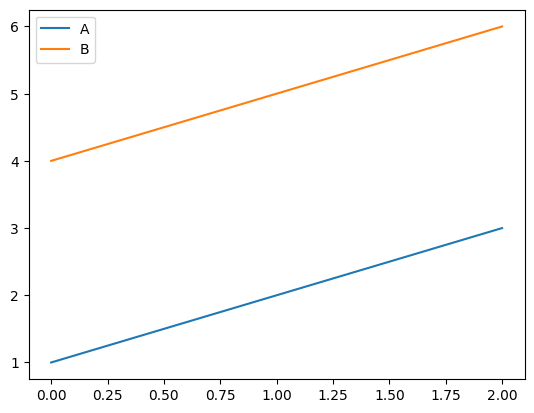

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
df_sum = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Plotting
df_sum.plot()
plt.show()

# 4. Importing and exporting data

In [130]:
# Pandas has many different read methods 
# Copy（ctrl+c)したものを視覚化する
import pandas as pd

data = pd.read_clipboard()

In [131]:
data

,CPI All-item index,129.8,-0.1,3.3
0,Food and non-alcoholic beverages,128.6,-1.2,7.4
1,Alcoholic beverages and tobacco,122.6,0.2,4.9
2,Clothing and footwear,106.8,5.0,6.0
3,"Housing, water, electricity, gas and other fuels",128.1,-1.8,-4.9
4,"Furnishings, household equipment and routine m...",139.1,1.8,6.4
5,Health,122.9,-0.2,4.0
6,Transport,136.7,0.3,6.3
7,Communications,124.9,0.8,5.4
8,Recreation and culture,139.0,0.6,9.3
9,Education,137.6,5.4,5.4


In [ ]:
ls

## From Excel:

In [ ]:
data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx')
data_excel.head()

In [ ]:
# We can get Pandas to read the dates for us 

data_excel = pd.read_excel('files/travel_changeFromSameMonth2019.xlsx',
                     index_col=[0],
                     parse_dates=True)
data_excel.head()

In [ ]:
data_excel.index

In [ ]:
data_excel.plot()

## From csv (Comma Separated Values):

In [ ]:
# Reading a csv-file

data_csv = pd.read_csv('files/travel_changeFromSameMonth2019.csv',
                      index_col=[0],
                      parse_dates=True)
data_csv.index

## Save dataframe as a csv-file

In [ ]:
# Let's create some random data 

df1 = pd.DataFrame(np.random.randn(30,5),
                   columns=list('ABCDE'),
                   index=pd.date_range('1990-01-01', periods=30, freq='A'))
df1.tail()

In [ ]:
# The .to_csv method saves the dataframe as a csv file

df1.to_csv('random_numbers2.csv')